''' 7.Car_Evaluation
Problem Statement:
Design a classification model using the Car Evaluation dataset to predict the overall car acceptability (unacceptable, acceptable, good, very good) based on features such as safety, price, and maintenance cost.
The goal is to help in the automatic rating of cars for decision support in automobile sales.'''

In [17]:
import pandas as pd

In [18]:
df=pd.read_csv("/content/Classification Datasets_Car_Evaluation.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [19]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [21]:
df.isnull()

,buying,maint,doors,persons,lug_boot,safety,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [23]:
df.tail(10)

,buying,maint,doors,persons,lug_boot,safety,class
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,low,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [24]:
df.shape

(1728, 7)

In [25]:
print(list(df.columns))

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in df.columns:
                            df[col]=label.fit_transform(df[col])
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [27]:
print(label.classes_)

['acc' 'good' 'unacc' 'vgood']


<Axes: ylabel='Frequency'>

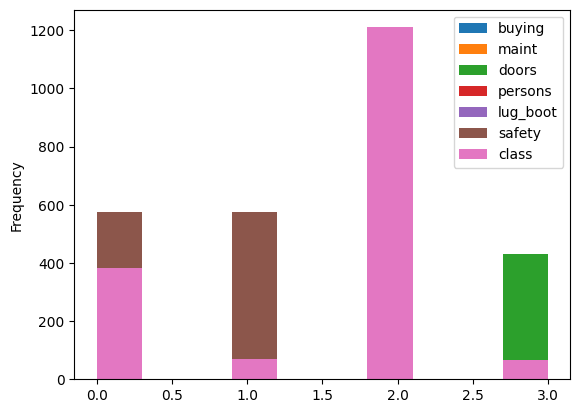

In [28]:
df.plot.hist()

<Axes: xlabel='safety', ylabel='class'>

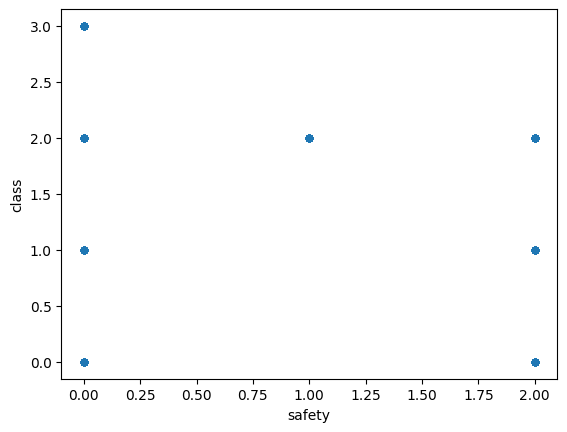

In [29]:
df.plot(x="safety", y="class",kind="scatter")

In [30]:
x=df.drop("class",axis =1)
y =df["class"]

In [31]:
print("x_shape",x.shape)
print("y_shape",y.shape)

x_shape (1728, 6)
y_shape (1728,)


In [32]:

from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state=42)

print("train_size of X",X_train.shape)#training
print("test_size of X",X_test.shape)#testing
print("train_size of y",y_train.shape)
print("test_size of y",y_test.shape)


train_size of X (1382, 6)
test_size of X (346, 6)
train_size of y (1382,)
test_size of y (346,)


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
model_dt = DecisionTreeClassifier(random_state =1)
model_rf = RandomForestClassifier(random_state =1)
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

In [36]:

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [38]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [39]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [40]:
y_pred_dt=model_dt.predict(X_test)
y_pred_rf=model_rf.predict(X_test)
y_pred_lr=model_lr.predict(X_test)

In [41]:
#y_pred_rf = [1 if each > 0.75 else 0 for each in y_pred_rf]

In [42]:
import seaborn as sns

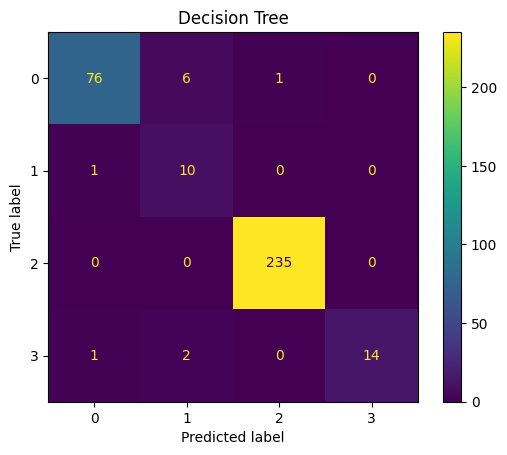

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346



In [43]:
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title("Decision Tree")
plt.show()
print(classification_report (y_test,y_pred_dt))

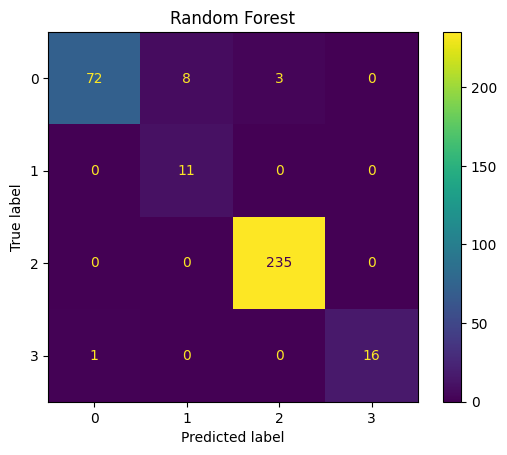

              precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.58      1.00      0.73        11
           2       0.99      1.00      0.99       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.89      0.95      0.90       346
weighted avg       0.97      0.97      0.97       346



In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title('Random Forest')
plt.show()

print(classification_report(y_test,y_pred_rf))

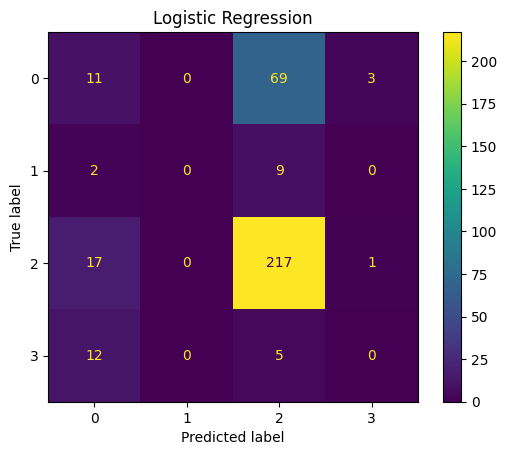

 Accuracy is 0.6589595375722543
              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

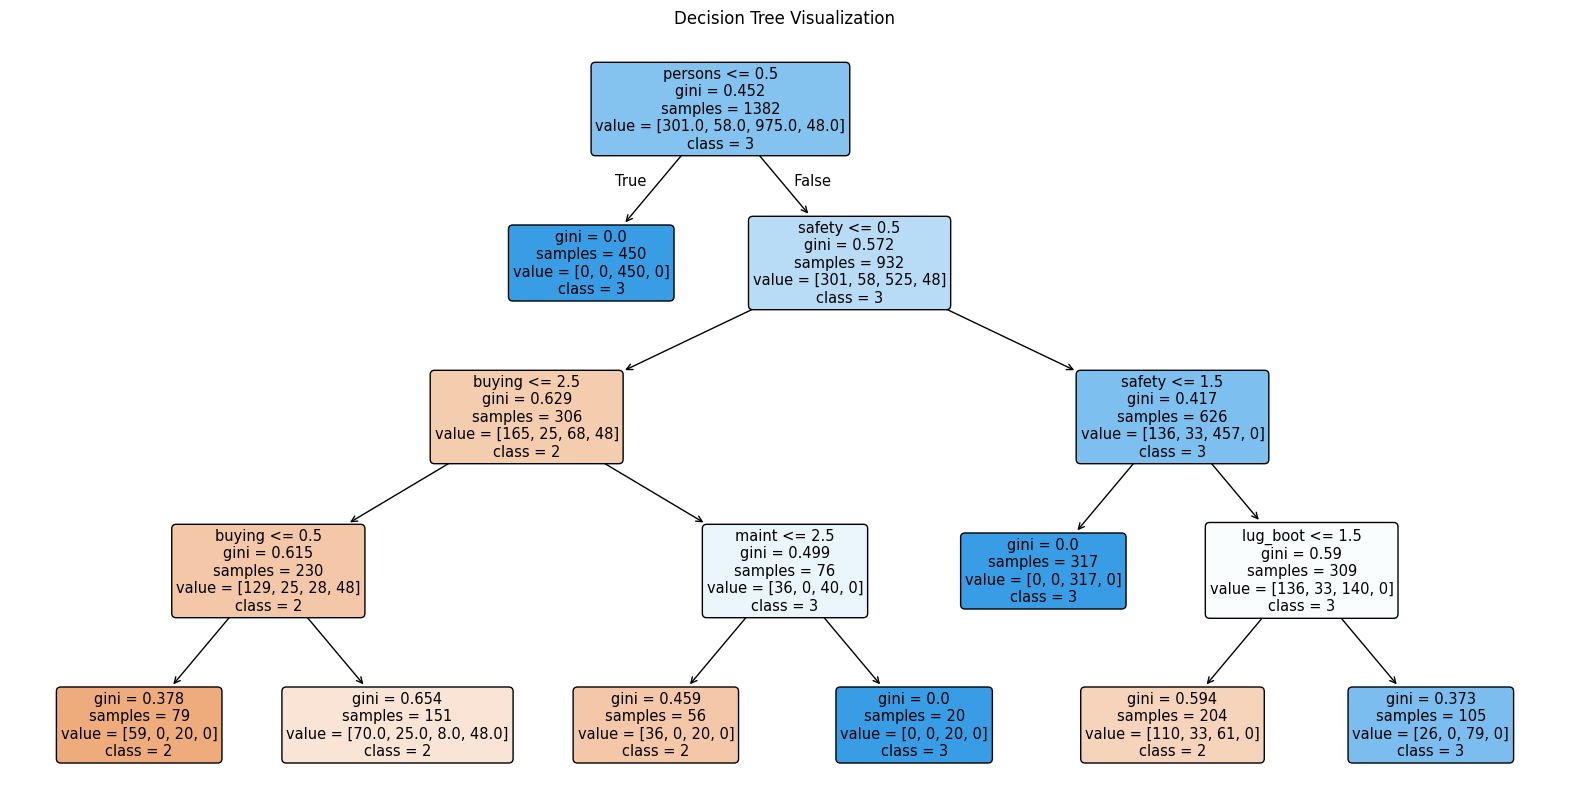

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)

plt.figure(figsize=(20,10))
# use the feature names from the training features (X_train). There is no 'y' column in df.
feature_names = X_train.columns
# use the classes learned by the classifier
class_names = y.unique().astype(str)
plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names,rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


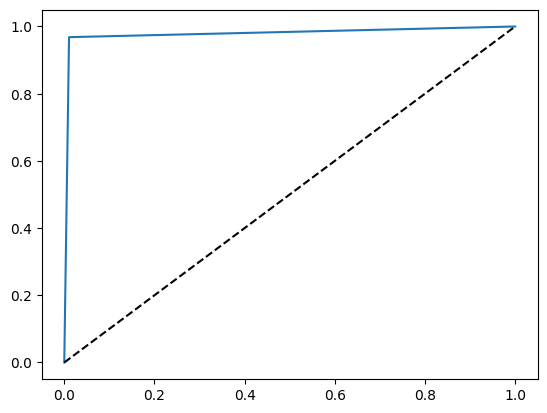

In [47]:

#Micro-average ROC in multiclass classification treats every class instance equally by flattening all
# true and predicted probabilities into a single binary set and generating one overall ROC curve.
# It measures global performance of the model across all classes
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
# Binarize labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#Micro-average ROC
#y_test_bin.ravel() → saare classes ke sab samples ko ek single long vector bana deta hai

#model.predict_proba(X_test).ravel() → saare class probabilities flatten kar deta hai
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), model_dt.predict_proba(X_test).ravel())

plt.plot(fpr, tpr); plt.plot([0,1],[0,1],'k--'); plt.show()


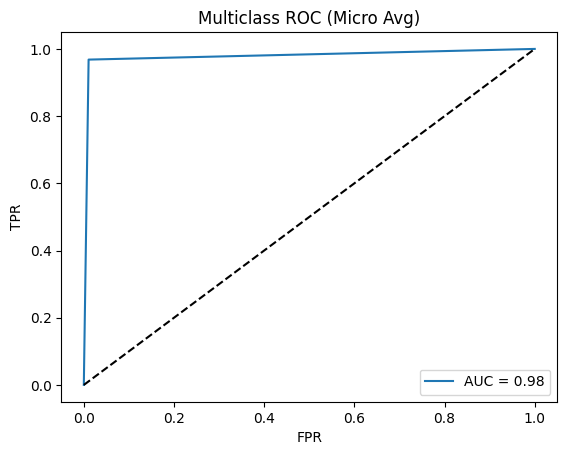

AUC Score: 0.9788053949903661


In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_prob_bin = model_dt.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob_bin.ravel())
roc_auc = auc(fpr,tpr)    # <-- AUC line

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Multiclass ROC (Micro Avg)")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)
